# Near-infrared spectra dataset of milk composition in transmittance mode

## Abstract

Monitoring of milk composition can support several dimensions of dairy management such as identification of the health status of individual dairy cows and the safeguarding of dairy quality. The quantification of milk composition has been traditionally executed employing destructive chemical or laboratory Fourier-transform infrared (FTIR) spectroscopy analyses which can incur high costs and prolonged waiting times for continuous monitoring. Therefore, modern technology for milk composition quantification relies on non-destructive near-infrared (NIR) spectroscopy which is not invasive and can be performed on-farm, in real-time.

The current dataset contains NIR spectral measurements in transmittance mode in the wavelength range from 960 nm to 1690 nm of 1224 individual raw milk samples, collected on-farm over an eight-week span in 2017, at the experimental dairy farm of the province of Antwerp, ‘Hooibeekhoeve’ (Geel, Belgium). For these spectral measurements, laboratory reference values corresponding to the three main components of raw milk (fat, protein and lactose), urea and somatic cell count (SCC) are included.

This data has been used to build multivariate calibration models to predict the three milk compounds, as well as develop strategies to monitor the prediction performance of the calibration models.

For all milkings performed by an automatic milking system (AMS), an on-farm long-wave near-infrared (LW-NIR, 960–1690 nm) analyzer measured the transmittance spectra of a representative raw milk sample. These measurements were acquired using a 256-pixel cooled InGaAs diode array NIR spectrometer (1.7-256 Plane Grating Spectrometer, Carl Zeiss, Jena, Germany) with a resolution of 2.86 nm per pixel, fixing an integration time of 100 ms and averaging 100 repeated measures. For the same sample, white and dark reference spectra were also acquired, and laboratory reference values for fat, protein, lactose, urea and somatic cell count (SCC) were obtained following ISO 9622 and ISO 13366-2:2006.

In [421]:
# import the libraries needed

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties

# Load and observe

In [2]:
# load the database

df = pd.read_csv("data_table.csv")

# check if it has been loaded well

df.head()

,Cow_ID,Fat,Prot,Lact,SCC,Urea,Milk_yield,Milk_Interv,SET,Time_Dark,...,Trans_White_247,Trans_White_248,Trans_White_249,Trans_White_250,Trans_White_251,Trans_White_252,Trans_White_253,Trans_White_254,Trans_White_255,Trans_White_256
0,57017,2.79,3.55,4.84,87,30,12.73,27256,1,1495647915,...,22039,21978,21916,21872,21818,21780,21758,21720,21698,21672
1,53330,4.70,3.29,4.94,14,29,15.00,34359,1,1495648408,...,22039,21978,21915,21872,21817,21779,21757,21719,21697,21672
2,59129,3.35,3.21,4.96,21,25,13.26,33081,1,1495648930,...,22039,21978,21916,21872,21817,21780,21758,21720,21698,21672
3,53333,2.69,3.02,4.83,9,31,18.19,30596,1,1495649484,...,22040,21979,21916,21872,21818,21780,21758,21720,21698,21672
4,57013,4.60,3.83,4.70,14,28,13.22,39668,1,1495651684,...,22039,21978,21915,21871,21816,21779,21757,21719,21696,21671


In [4]:
# basic info about the size and data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1224 entries, 0 to 1223
Columns: 1038 entries, Cow_ID to Trans_White_256
dtypes: float64(260), int64(778)
memory usage: 9.7 MB


In [36]:
# observe the columns

print(df.columns.to_list())

['Cow_ID', 'Fat', 'Prot', 'Lact', 'SCC', 'Urea', 'Milk_yield', 'Milk_Interv', 'SET', 'Time_Dark', 'Time_Milk', 'Time_PrevMilk', 'Time_Sample', 'Time_White', 'Trans_Dark_1', 'Trans_Dark_2', 'Trans_Dark_3', 'Trans_Dark_4', 'Trans_Dark_5', 'Trans_Dark_6', 'Trans_Dark_7', 'Trans_Dark_8', 'Trans_Dark_9', 'Trans_Dark_10', 'Trans_Dark_11', 'Trans_Dark_12', 'Trans_Dark_13', 'Trans_Dark_14', 'Trans_Dark_15', 'Trans_Dark_16', 'Trans_Dark_17', 'Trans_Dark_18', 'Trans_Dark_19', 'Trans_Dark_20', 'Trans_Dark_21', 'Trans_Dark_22', 'Trans_Dark_23', 'Trans_Dark_24', 'Trans_Dark_25', 'Trans_Dark_26', 'Trans_Dark_27', 'Trans_Dark_28', 'Trans_Dark_29', 'Trans_Dark_30', 'Trans_Dark_31', 'Trans_Dark_32', 'Trans_Dark_33', 'Trans_Dark_34', 'Trans_Dark_35', 'Trans_Dark_36', 'Trans_Dark_37', 'Trans_Dark_38', 'Trans_Dark_39', 'Trans_Dark_40', 'Trans_Dark_41', 'Trans_Dark_42', 'Trans_Dark_43', 'Trans_Dark_44', 'Trans_Dark_45', 'Trans_Dark_46', 'Trans_Dark_47', 'Trans_Dark_48', 'Trans_Dark_49', 'Trans_Dark_50', 'T

## Distributions histograms

In [196]:
# Set up colors for plotting

colors = [
    "#001F3F", "#0074E4", "#3498DB",  # Blue Shades
    "#006400", "#228B22", "#00FF00",  # Green Shades
    "#8B0000", "#B22222", "#CD5C5C",  # Red Shades
    "#800080", "#9370DB", "#E6E6FA",  # Purple Shades
    "#FF8C00", "#FF6347", "#FA8072",  # Orange Shades
    "#404040", "#808080", "#D3D3D3",  # Gray Shades
    "#75ba6f", "#292929", "#29509c", "#e7353e"  # NEW: Collo colors
]

# Set fonts
font_12 = FontProperties(family="Helvetica Neue", size=12)
font_16 = FontProperties(family="Helvetica Neue", size=16)

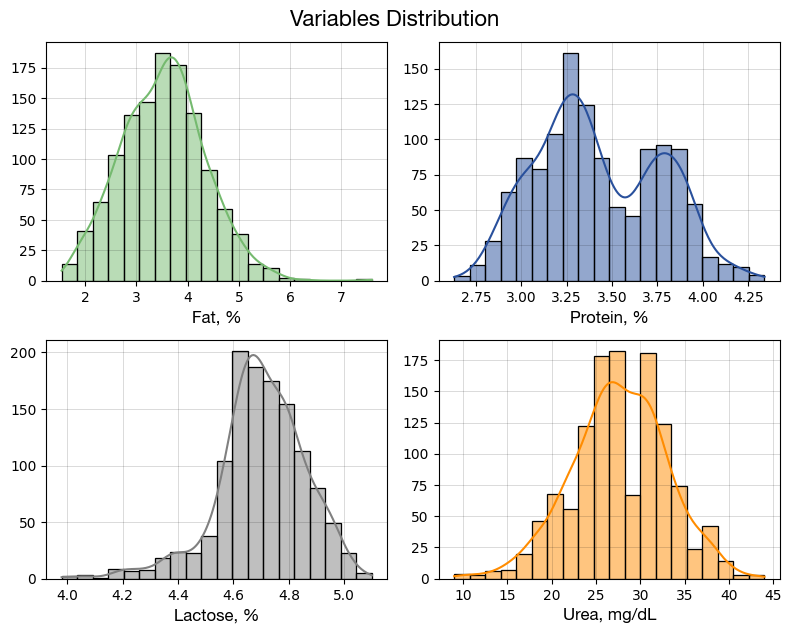

In [418]:
# Univariate Analysis

# Set up subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8, 9))

# Flatten the axes for easy numeration
axes = axes.flatten()

# Drawing histograms
axes[0].set_xlabel('Fat, %', color='black', fontproperties=font_12)
sns.histplot(df.Fat, kde=True, ax=axes[0], color=colors[18], bins=20)

axes[1].set_xlabel('Protein, %', color='black', fontproperties=font_12)
sns.histplot(df.Prot, kde=True, ax=axes[1], color=colors[20], bins=20)

axes[2].set_xlabel('Lactose, %', color='black', fontproperties=font_12)
sns.histplot(df.Lact, kde=True, ax=axes[2], color=colors[16], bins=20)

axes[3].set_xlabel('Urea, mg/dL', color='black', fontproperties=font_12)
sns.histplot(df.Urea, kde=True, ax=axes[3], color=colors[12], bins=20)

# Adjust layout
for ax in axes:
    ax.set_facecolor('#ffffff')
    ax.grid(linewidth=0.5, color='black', alpha=0.2)
    ax.tick_params(colors='black')
    ax.set_ylabel('', color='black', fontproperties=font_12)

fig.set_facecolor('#ffffff')
plt.xticks(fontproperties=font_12)
plt.yticks(fontproperties=font_12)
plt.suptitle("Variables Distribution", color='black', fontproperties=font_16)
axes[4].set_visible(False)
axes[5].set_visible(False)
plt.tight_layout()
plt.show()


In [455]:
# describe essential substances in milk

df[["Fat", "Prot", "Lact", "Urea"]].describe().round(2)

,Fat,Prot,Lact,Urea
count,1224.00,1224.00,1224.00,1224.0
mean,3.52,3.42,4.70,27.6
std,0.81,0.34,0.16,5.4
min,1.54,2.63,3.98,9.0
25%,2.95,3.17,4.62,24.0
50%,3.54,3.37,4.70,28.0
75%,4.04,3.72,4.80,31.0
max,7.60,4.34,5.10,44.0


## Spectrograms

In [175]:
# column names like Trans_dark134 doesn't reflect wavelength,
# thus making the actual wavelength range from 960nm to 1690nm
wave_length_range = [round(960 + a * (1690-960) / 256) for a in range(256)]

# locate all the different measurements types, 256 each.
X_dark = df.iloc[:, 14:14+256]
X_sample = df.iloc[:, 14+256:14+512]
X_norm = df.iloc[:, 14+512:14+768]
X_white = df.iloc[:, 14+768:]

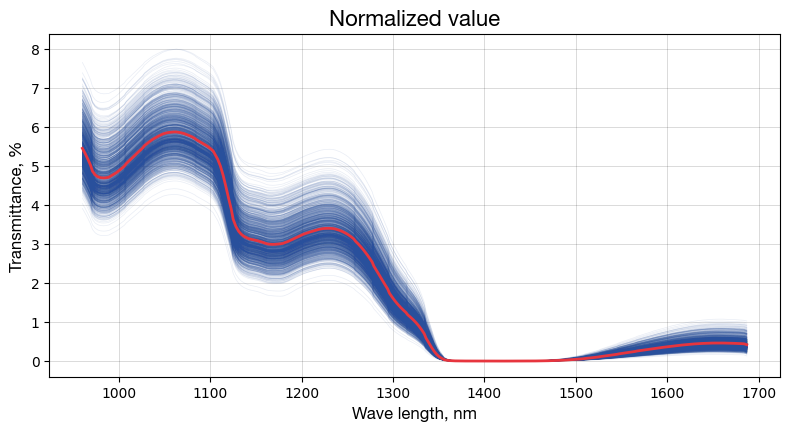

In [419]:
# SPECTROGRAM FOR NORMALIZED VALUES
# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))

# Flatten the axes for easy numeration
axes = axes.flatten()

# Drawing histograms
axes[0].set_title('Normalized value', color='black', fontproperties=font_16)
axes[0].plot(wave_length_range, X_norm.iloc[:,:].transpose() , color=colors[20], linewidth=0.5, alpha=0.1)
axes[0].plot(wave_length_range, X_norm.mean() , color=colors[21], linewidth=2, alpha=1)


for ax in axes:
    ax.set_facecolor('#ffffff')
    ax.grid(linewidth=0.5, color='black', alpha=0.2)
    ax.tick_params(colors='black')
    ax.set_ylabel('Transmittance, %', color='black', fontproperties=font_12)
    ax.set_xlabel('Wave length, nm', color='black', fontproperties=font_12)

fig.set_facecolor('#ffffff')
plt.xticks(fontproperties=font_12)
plt.yticks(fontproperties=font_12)
# plt.suptitle("", color='black', fontproperties=font_16)
axes[1].set_visible(False)
# axes[5].set_visible(False)
plt.tight_layout()
plt.show()

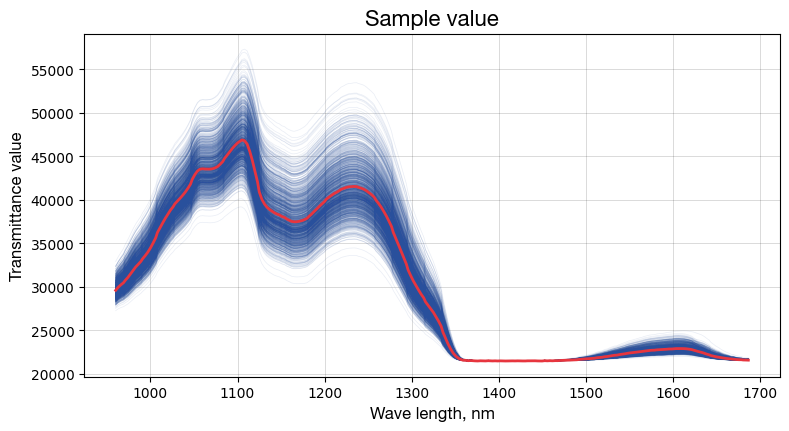

In [420]:
# SPECTROGRAM FOR DIGITAL VALUES
# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))

# Flatten the axes for easy numeration
axes = axes.flatten()

# Drawing histograms
axes[0].set_title('Sample value', color='black', fontproperties=font_16)
axes[0].plot(wave_length_range, X_sample.iloc[:,:].transpose() , color=colors[20], linewidth=0.5, alpha=0.1)
axes[0].plot(wave_length_range, X_sample.mean() , color=colors[21], linewidth=2, alpha=1)


for ax in axes:
    ax.set_facecolor('#ffffff')
    ax.grid(linewidth=0.5, color='black', alpha=0.2)
    ax.tick_params(colors='black')
    ax.set_ylabel('Transmittance value', color='black', fontproperties=font_12)
    ax.set_xlabel('Wave length, nm', color='black', fontproperties=font_12)

fig.set_facecolor('#ffffff')
plt.xticks(fontproperties=font_12)
plt.yticks(fontproperties=font_12)
# plt.suptitle("", color='black', fontproperties=font_16)
axes[1].set_visible(False)
# axes[5].set_visible(False)
plt.tight_layout()
plt.show()

# MACHINE LEARNING MODELS


## Preprocessing data

In [437]:
# features normalization with MinMaxScaler

minmaxscaler_norm = MinMaxScaler()
X_norm_scaled = norm_minmaxscaler.fit_transform(X_norm)

minmaxscaler_sample = MinMaxScaler()
X_sample_scaled = norm_minmaxscaler.fit_transform(X_sample)

In [434]:
# setting y's

y_prot = df.Prot
y_fat = df.Fat
y_lact = df.Lact
y_urea = df.Urea

## Linear regression model

In [479]:
def linear_regression_test(X, y, test_name):
    # train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
    
    # set the model
    model = LinearRegression()
    
    # fit the train data to the model
    model.fit(X_train, y_train)
    
    
    # model scores
    # r2 scores
    r2_score_train = model.score(X_train, y_train)
    r2_score_test = model.score(X_test, y_test)
    
    # predictions
    predictions_train = model.predict(X_train)
    predictions_test = model.predict(X_test)
    
    # mean absolute errors
    mae_train = mean_absolute_error(predictions_train, y_train)
    mae_test = mean_absolute_error(predictions_test, y_test)
    
    # mean squared errors
    mse_train = mean_squared_error(predictions_train, y_train)
    mse_test = mean_squared_error(predictions_test, y_test)
    
    
    # printed output
    print("-"*25)
    print("Test name:", test_name.upper(), '\n')
    print("{:10s}  {:5s}  {:5s}".format("Score type", "Train", "Test"))
    print("{:10s}  {:.3f}  {:.3f}".format("R2 score", r2_score_train, r2_score_test))
    print("{:10s}  {:.3f}  {:.3f}".format("MAE", mae_train, mae_test))
    print("{:10s}  {:.3f}  {:.3f}".format("MSE", mse_train, mse_test))
    
    
    # plot
    plt.figure(figsize=(8, 6))

    plt.scatter(y_test, predictions_test, c=colors[20], marker='.', linewidths=2)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color=colors[21], linewidth=2)

    plt.grid(linewidth=0.5, color='black', alpha=0.2)
    plt.title(test_name.upper(), fontproperties=font_16)
    plt.xticks(fontproperties=font_12)
    plt.yticks(fontproperties=font_12)
    plt.show()
    
    
    # output
    return model


-------------------------
Test name: PROTEIN / NORMALIZED TRANSMITTANCE 

Score type  Train  Test 
R2 score    0.987  0.974
MAE         0.030  0.041
MSE         0.001  0.003


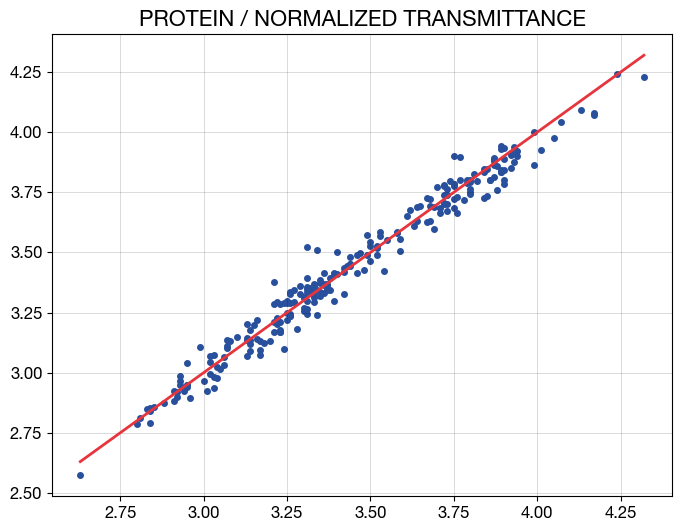

-------------------------
Test name: PROTEIN / DIGITAL TRANSMITTANCE 

Score type  Train  Test 
R2 score    0.987  0.968
MAE         0.030  0.043
MSE         0.001  0.004


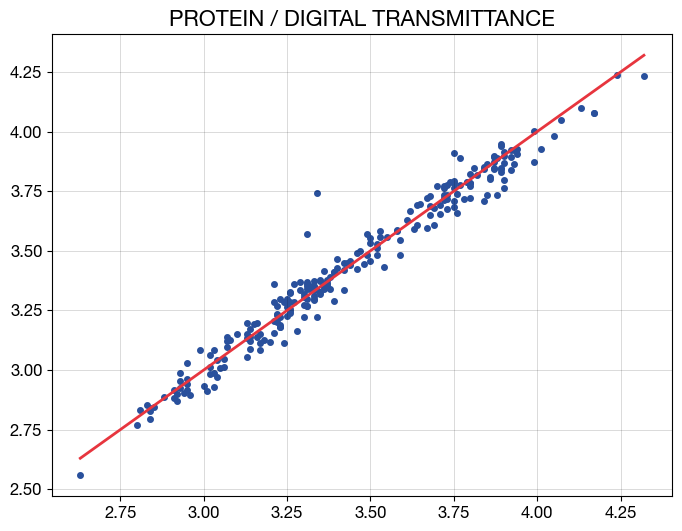

-------------------------
Test name: FAT / NORMALIZED TRANSMITTANCE 

Score type  Train  Test 
R2 score    0.995  0.971
MAE         0.039  0.064
MSE         0.003  0.019


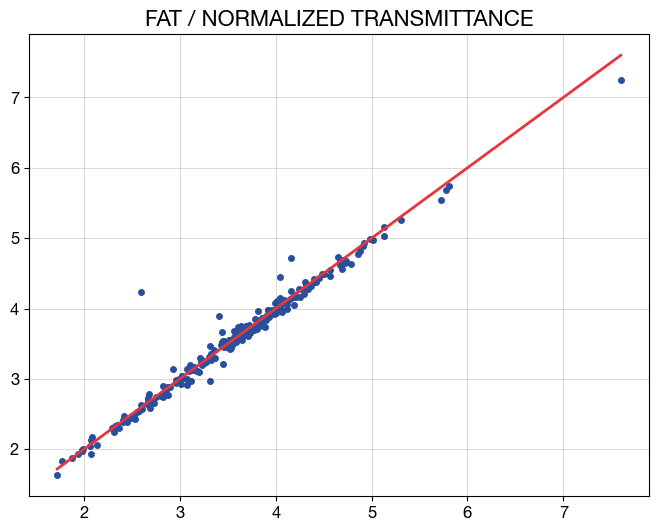

-------------------------
Test name: FAT / DIGITAL TRANSMITTANCE 

Score type  Train  Test 
R2 score    0.995  0.970
MAE         0.039  0.066
MSE         0.003  0.020


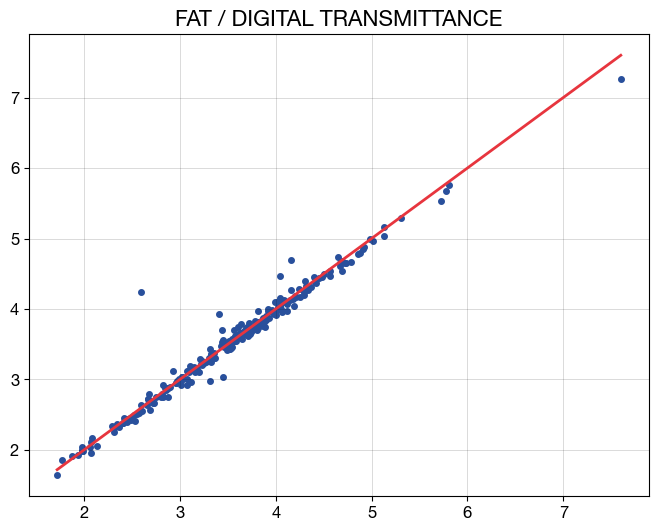

-------------------------
Test name: LACTOSE / NORMALIZED TRANSMITTANCE 

Score type  Train  Test 
R2 score    0.920  0.894
MAE         0.036  0.043
MSE         0.002  0.003


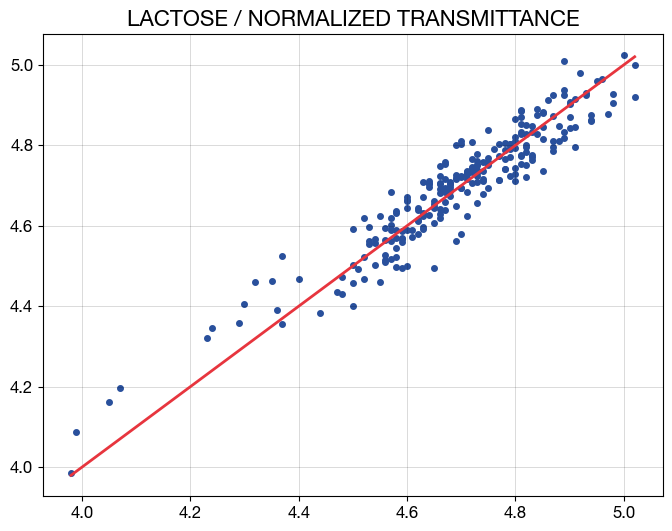

-------------------------
Test name: LACTOSE / DIGITAL TRANSMITTANCE 

Score type  Train  Test 
R2 score    0.922  0.884
MAE         0.035  0.045
MSE         0.002  0.003


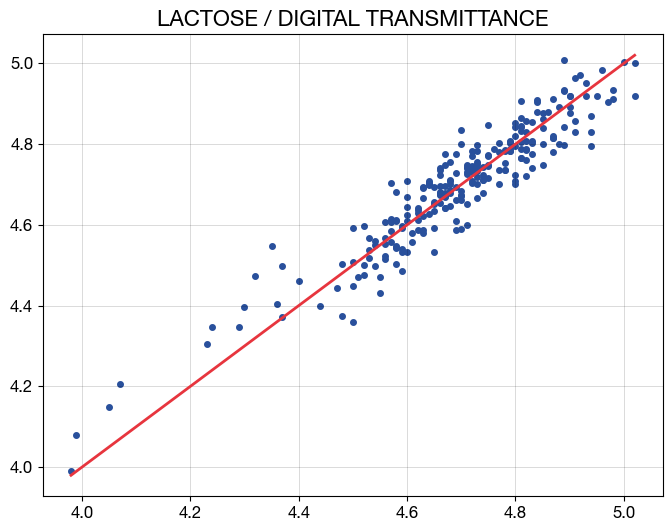

-------------------------
Test name: UREA / NORMALIZED TRANSMITTANCE 

Score type  Train  Test 
R2 score    0.607  0.037
MAE         2.707  3.720
MSE         11.767  24.950


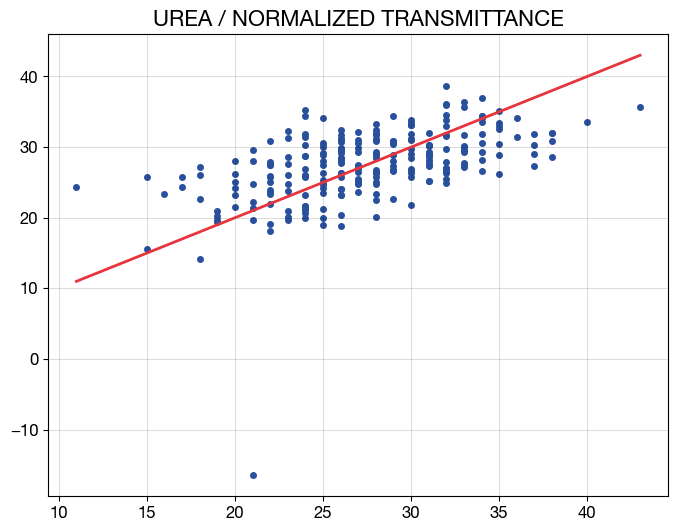

-------------------------
Test name: UREA / DIGITAL TRANSMITTANCE 

Score type  Train  Test 
R2 score    0.610  0.059
MAE         2.680  3.683
MSE         11.664  24.376


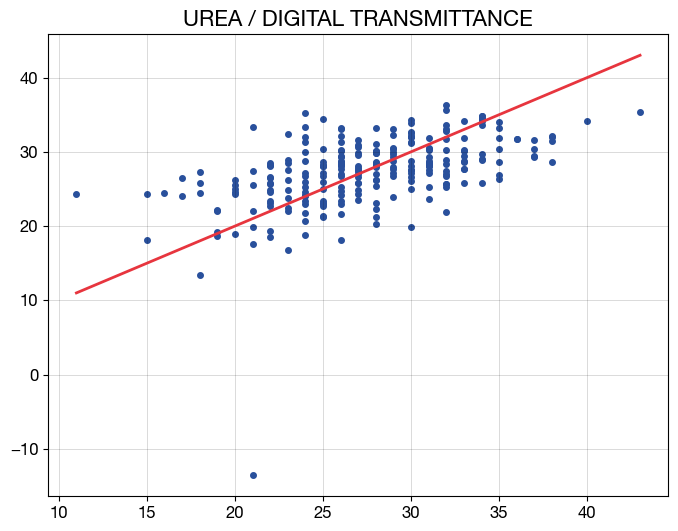

In [481]:
prot_norm = linear_regression_test(X_norm_scaled, y_prot, "Protein / Normalized transmittance")
prot_sample = linear_regression_test(X_sample_scaled, y_prot, "Protein / Digital transmittance")

fat_norm = linear_regression_test(X_norm_scaled, y_fat, "Fat / Normalized transmittance")
fat_sample = linear_regression_test(X_sample_scaled, y_fat, "Fat / Digital transmittance")

lact_norm = linear_regression_test(X_norm_scaled, y_lact, "Lactose / Normalized transmittance")
lact_sample = linear_regression_test(X_sample_scaled, y_lact, "Lactose / Digital transmittance")

urea_norm = linear_regression_test(X_norm_scaled, y_urea, "Urea / Normalized transmittance")
urea_sample = linear_regression_test(X_sample_scaled, y_urea, "Urea / Digital transmittance")